In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

In [16]:
# prompt: load file named usefile.csv from folder Colab Notebooks/Data

train=pd.read_csv('CIC-IDS-2018(15).csv')
train

C:\Users\ashwa\AppData\Local\Temp\ipykernel_340\980695311.py:3: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv('CIC-IDS-2018(15).csv')


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,57610,6,02/03/2018 04:14:05,25,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,52347,6,02/03/2018 02:48:44,63,3,1,31,0.0,31,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,55970,6,16/02/2018 01:46:19,4217799,5,3,935,350.0,935,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,80,6,02/03/2018 05:17:21,54499550,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,3389,6,02/03/2018 01:53:13,2697973,9,10,1278,1677.0,677,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828419,22,6,14/02/2018 03:13:27,381223,22,22,1912,2665,640,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce
828420,22,6,14/02/2018 03:27:51,324836,23,20,1928,2665,640,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce
828421,22,6,14/02/2018 02:39:25,393769,22,20,1944,2665,640,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce
828422,22,6,14/02/2018 03:16:09,297287,22,22,1928,2665,640,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce


In [17]:
train.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [18]:
train["Label"].unique()

array(['Benign', 'Bot', 'DoS attacks-Hulk', 'DoS attacks-SlowHTTPTest',
       'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection',
       'DoS attacks-GoldenEye', 'DoS attacks-Slowloris', 'Infilteration',
       'Label', 'DDOS attack-HOIC', 'DDOS attack-LOIC-UDP',
       'FTP-BruteForce', 'SSH-Bruteforce'], dtype=object)

In [19]:
print(train["Label"].value_counts()[['Benign']].sum())
print(train["Label"].value_counts()[['Bot']].sum())


611216
28619


In [20]:
# Remove erroneous 'Label' row
train.drop(train.loc[train["Label"] == "Label"].index, inplace=True)

In [21]:
train

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,57610,6,02/03/2018 04:14:05,25,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,52347,6,02/03/2018 02:48:44,63,3,1,31,0.0,31,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,55970,6,16/02/2018 01:46:19,4217799,5,3,935,350.0,935,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,80,6,02/03/2018 05:17:21,54499550,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,3389,6,02/03/2018 01:53:13,2697973,9,10,1278,1677.0,677,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828419,22,6,14/02/2018 03:13:27,381223,22,22,1912,2665,640,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce
828420,22,6,14/02/2018 03:27:51,324836,23,20,1928,2665,640,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce
828421,22,6,14/02/2018 02:39:25,393769,22,20,1944,2665,640,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce
828422,22,6,14/02/2018 03:16:09,297287,22,22,1928,2665,640,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce


In [22]:
train["Protocol"].unique()
# Forcing them to be strings
train = train.astype({"Protocol": str})
train["Protocol"].unique()
train = pd.get_dummies(train, columns=['Protocol'], drop_first=True)
train

,Dst Port,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Protocol_17,Protocol_6
0,57610,02/03/2018 04:14:05,25,2,0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
1,52347,02/03/2018 02:48:44,63,3,1,31,0.0,31,0,10.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
2,55970,16/02/2018 01:46:19,4217799,5,3,935,350.0,935,0,187.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
3,80,02/03/2018 05:17:21,54499550,2,0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
4,3389,02/03/2018 01:53:13,2697973,9,10,1278,1677.0,677,0,142.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828419,22,14/02/2018 03:13:27,381223,22,22,1912,2665,640,0,86.909091,...,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,False,True
828420,22,14/02/2018 03:27:51,324836,23,20,1928,2665,640,0,83.826087,...,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,False,True
828421,22,14/02/2018 02:39:25,393769,22,20,1944,2665,640,0,88.363636,...,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,False,True
828422,22,14/02/2018 03:16:09,297287,22,22,1928,2665,640,0,87.636364,...,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,False,True


In [23]:
columns_to_drop = [
    'Dst Port',
    'Timestamp',
    'Fwd PSH Flags',
    'Bwd PSH Flags',
    'Fwd URG Flags',
    'Bwd URG Flags',
    'Flow Byts/s',  # This field had np.inf values during training, as such was removed
    'Flow Pkts/s'  # This field had np.inf values during training, as such was removed
]

In [24]:
train.drop(columns=columns_to_drop, inplace=True)
train

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Protocol_17,Protocol_6
0,25,2,0,0,0.0,0,0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
1,63,3,1,31,0.0,31,0,10.333333,17.897858,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
2,4217799,5,3,935,350.0,935,0,187.0,418.144712,350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
3,54499550,2,0,0,0.0,0,0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
4,2697973,9,10,1278,1677.0,677,0,142.0,213.267438,1173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828419,381223,22,22,1912,2665,640,0,86.909091,137.688022,976,...,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,False,True
828420,324836,23,20,1928,2665,640,0,83.826087,135.847392,976,...,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,False,True
828421,393769,22,20,1944,2665,640,0,88.363636,137.869001,976,...,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,False,True
828422,297287,22,22,1928,2665,640,0,87.636364,137.780552,976,...,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,False,True


In [25]:
train.dropna(inplace=True)
train

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Protocol_17,Protocol_6
0,25,2,0,0,0.0,0,0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
1,63,3,1,31,0.0,31,0,10.333333,17.897858,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
2,4217799,5,3,935,350.0,935,0,187.0,418.144712,350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
3,54499550,2,0,0,0.0,0,0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
4,2697973,9,10,1278,1677.0,677,0,142.0,213.267438,1173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828419,381223,22,22,1912,2665,640,0,86.909091,137.688022,976,...,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,False,True
828420,324836,23,20,1928,2665,640,0,83.826087,135.847392,976,...,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,False,True
828421,393769,22,20,1944,2665,640,0,88.363636,137.869001,976,...,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,False,True
828422,297287,22,22,1928,2665,640,0,87.636364,137.780552,976,...,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,False,True


In [26]:
train.drop_duplicates(inplace=True)
train

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Protocol_17,Protocol_6
0,25,2,0,0,0.0,0,0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
1,63,3,1,31,0.0,31,0,10.333333,17.897858,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
2,4217799,5,3,935,350.0,935,0,187.0,418.144712,350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
3,54499550,2,0,0,0.0,0,0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
4,2697973,9,10,1278,1677.0,677,0,142.0,213.267438,1173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828418,393263,22,20,1928,2665,640,0,87.636364,137.780552,976,...,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,False,True
828419,381223,22,22,1912,2665,640,0,86.909091,137.688022,976,...,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,False,True
828420,324836,23,20,1928,2665,640,0,83.826087,135.847392,976,...,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,False,True
828421,393769,22,20,1944,2665,640,0,88.363636,137.869001,976,...,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,False,True


In [27]:
print(train["Label"].value_counts()[['Benign']].sum())
print(train["Label"].value_counts()[['Bot']].sum())


521038
15238


In [28]:
train.replace(to_replace="Benign", value=0, inplace=True)
train.replace(to_replace="Bot", value=1, inplace=True)

train


,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Protocol_17,Protocol_6
0,25,2,0,0,0.0,0,0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
1,63,3,1,31,0.0,31,0,10.333333,17.897858,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
2,4217799,5,3,935,350.0,935,0,187.0,418.144712,350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
3,54499550,2,0,0,0.0,0,0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
4,2697973,9,10,1278,1677.0,677,0,142.0,213.267438,1173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828418,393263,22,20,1928,2665,640,0,87.636364,137.780552,976,...,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,False,True
828419,381223,22,22,1912,2665,640,0,86.909091,137.688022,976,...,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,False,True
828420,324836,23,20,1928,2665,640,0,83.826087,135.847392,976,...,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,False,True
828421,393769,22,20,1944,2665,640,0,88.363636,137.869001,976,...,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,False,True


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 630062 entries, 0 to 828422
Data columns (total 73 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Flow Duration      630062 non-null  object
 1   Tot Fwd Pkts       630062 non-null  object
 2   Tot Bwd Pkts       630062 non-null  object
 3   TotLen Fwd Pkts    630062 non-null  object
 4   TotLen Bwd Pkts    630062 non-null  object
 5   Fwd Pkt Len Max    630062 non-null  object
 6   Fwd Pkt Len Min    630062 non-null  object
 7   Fwd Pkt Len Mean   630062 non-null  object
 8   Fwd Pkt Len Std    630062 non-null  object
 9   Bwd Pkt Len Max    630062 non-null  object
 10  Bwd Pkt Len Min    630062 non-null  object
 11  Bwd Pkt Len Mean   630062 non-null  object
 12  Bwd Pkt Len Std    630062 non-null  object
 13  Flow IAT Mean      630062 non-null  object
 14  Flow IAT Std       630062 non-null  object
 15  Flow IAT Max       630062 non-null  object
 16  Flow IAT Min       630062

In [30]:
train = pd.DataFrame(train)
train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [31]:
train

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Protocol_17,Protocol_6
0,25,2,0,0,0.0,0,0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
1,63,3,1,31,0.0,31,0,10.333333,17.897858,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
2,4217799,5,3,935,350.0,935,0,187.0,418.144712,350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
3,54499550,2,0,0,0.0,0,0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
4,2697973,9,10,1278,1677.0,677,0,142.0,213.267438,1173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828418,393263,22,20,1928,2665,640,0,87.636364,137.780552,976,...,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,False,True
828419,381223,22,22,1912,2665,640,0,86.909091,137.688022,976,...,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,False,True
828420,324836,23,20,1928,2665,640,0,83.826087,135.847392,976,...,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,False,True
828421,393769,22,20,1944,2665,640,0,88.363636,137.869001,976,...,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,False,True


In [32]:
train.columns

Index(['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Len', 'Bwd Header Len',
       'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max',
       'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt',
       'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio',
       'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
       'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'B

In [33]:
train["Label"].value_counts()

Label
0                           521038
DDOS attack-HOIC             35609
DoS attacks-Hulk             29818
1                            15238
Infilteration                13401
SSH-Bruteforce                9429
DoS attacks-GoldenEye         4151
DoS attacks-Slowloris         1026
DDOS attack-LOIC-UDP           173
Brute Force -Web                60
DoS attacks-SlowHTTPTest        46
FTP-BruteForce                  42
Brute Force -XSS                23
SQL Injection                    8
Name: count, dtype: int64

<Axes: >

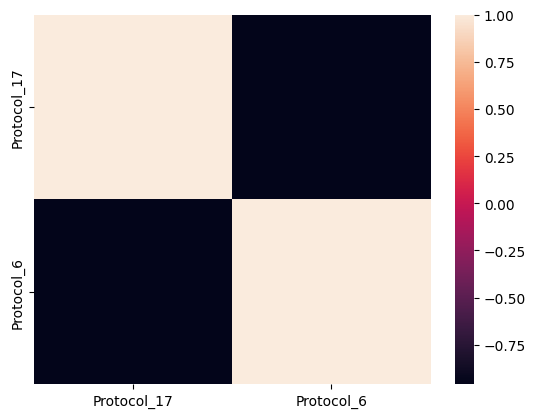

In [34]:
import seaborn as sns
sns.heatmap(train.corr(numeric_only=True))

In [35]:
X = train.drop(["Label"], axis=1)
# X = X[numeric_columns]

y =  train["Label"]

print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
Index: 630062 entries, 0 to 828422
Data columns (total 72 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Flow Duration      630062 non-null  object
 1   Tot Fwd Pkts       630062 non-null  object
 2   Tot Bwd Pkts       630062 non-null  object
 3   TotLen Fwd Pkts    630062 non-null  object
 4   TotLen Bwd Pkts    630062 non-null  object
 5   Fwd Pkt Len Max    630062 non-null  object
 6   Fwd Pkt Len Min    630062 non-null  object
 7   Fwd Pkt Len Mean   630062 non-null  object
 8   Fwd Pkt Len Std    630062 non-null  object
 9   Bwd Pkt Len Max    630062 non-null  object
 10  Bwd Pkt Len Min    630062 non-null  object
 11  Bwd Pkt Len Mean   630062 non-null  object
 12  Bwd Pkt Len Std    630062 non-null  object
 13  Flow IAT Mean      630062 non-null  object
 14  Flow IAT Std       630062 non-null  object
 15  Flow IAT Max       630062 non-null  object
 16  Flow IAT Min       630062

In [36]:
print(y.dtypes)

object


In [37]:
print(y.unique())

[0 1 'DoS attacks-Hulk' 'DoS attacks-SlowHTTPTest' 'Brute Force -Web'
 'Brute Force -XSS' 'SQL Injection' 'DoS attacks-GoldenEye'
 'DoS attacks-Slowloris' 'Infilteration' 'DDOS attack-HOIC'
 'DDOS attack-LOIC-UDP' 'FTP-BruteForce' 'SSH-Bruteforce']


In [38]:
label_mapping = {
    'DoS attacks-Hulk': 2,
    'DoS attacks-SlowHTTPTest': 3,
    'Brute Force -Web': 4,
    'Brute Force -XSS': 5,
    'SQL Injection': 6,
    'DoS attacks-GoldenEye': 7,
    'DoS attacks-Slowloris': 8,
    'Infilteration': 9,
    'DDOS attack-HOIC': 10,
    'DDOS attack-LOIC-UDP': 11,
    'FTP-BruteForce': 12,
    'SSH-Bruteforce': 13
}

In [39]:
y_mapped = y.replace(label_mapping)

In [40]:
print(y_mapped)

0          0
1          0
2          0
3          0
4          0
          ..
828418    13
828419    13
828420    13
828421    13
828422    13
Name: Label, Length: 630062, dtype: int64


In [41]:
ss = StandardScaler()
X = ss.fit_transform(X)

le = LabelEncoder()
target_class = y.unique()
y = le.fit_transform(y_mapped)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [43]:
train

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Protocol_17,Protocol_6
0,25,2,0,0,0.0,0,0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
1,63,3,1,31,0.0,31,0,10.333333,17.897858,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
2,4217799,5,3,935,350.0,935,0,187.0,418.144712,350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
3,54499550,2,0,0,0.0,0,0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
4,2697973,9,10,1278,1677.0,677,0,142.0,213.267438,1173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828418,393263,22,20,1928,2665,640,0,87.636364,137.780552,976,...,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,False,True
828419,381223,22,22,1912,2665,640,0,86.909091,137.688022,976,...,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,False,True
828420,324836,23,20,1928,2665,640,0,83.826087,135.847392,976,...,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,False,True
828421,393769,22,20,1944,2665,640,0,88.363636,137.869001,976,...,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,False,True


In [44]:
print(train.dtypes)


Flow Duration      object
Tot Fwd Pkts       object
Tot Bwd Pkts       object
TotLen Fwd Pkts    object
TotLen Bwd Pkts    object
                    ...  
Idle Max           object
Idle Min           object
Label              object
Protocol_17          bool
Protocol_6           bool
Length: 73, dtype: object


In [45]:
import pandas as pd

# Convert object-type columns to numerical values
object_columns = train.select_dtypes(include=['object']).columns
train[object_columns] = train[object_columns].apply(pd.to_numeric, errors='coerce')

# Convert boolean columns to numerical values mapped to class labels
bool_columns = train.select_dtypes(include=['bool']).columns
class_labels = {
    'DoS attacks-Hulk': 2,
    'DoS attacks-SlowHTTPTest': 3,
    'Brute Force -Web': 4,
    'Brute Force -XSS': 5,
    'SQL Injection': 6,
    'DoS attacks-GoldenEye': 7,
    'DoS attacks-Slowloris': 8,
    'Infilteration': 9,
    'DDOS attack-HOIC': 10,
    'DDOS attack-LOIC-UDP': 11,
    'FTP-BruteForce': 12,
    'SSH-Bruteforce': 13,
    True: 1,  # Additional class label
    False: 0  # Additional class label
}

train[bool_columns] = train[bool_columns].replace(class_labels)

# Convert bool-type columns to categorical columns
train[bool_columns] = train[bool_columns].astype('category')

# Now check the data types again to confirm the conversion
print(train.dtypes)



Flow Duration         int64
Tot Fwd Pkts          int64
Tot Bwd Pkts          int64
TotLen Fwd Pkts       int64
TotLen Bwd Pkts     float64
                     ...   
Idle Max            float64
Idle Min            float64
Label               float64
Protocol_17        category
Protocol_6         category
Length: 73, dtype: object


In [46]:
numerical_columns = train.select_dtypes(include=['float64', 'int64']).columns
train[numerical_columns] = train[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Now check the data types again to confirm the conversion
print(train.dtypes)

Flow Duration         int64
Tot Fwd Pkts          int64
Tot Bwd Pkts          int64
TotLen Fwd Pkts       int64
TotLen Bwd Pkts     float64
                     ...   
Idle Max            float64
Idle Min            float64
Label               float64
Protocol_17        category
Protocol_6         category
Length: 73, dtype: object


In [47]:
# Convert numerical columns to numeric data types
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

categorical_columns = train.select_dtypes(include=['category']).columns

# Now you can proceed with scaling the numerical columns
scaler = MinMaxScaler()
train_scaled_values = scaler.fit_transform(train[numerical_columns])

# Merge scaled numerical columns with the original DataFrame
train_scaled = pd.DataFrame(train_scaled_values, columns=numerical_columns)
train_scaled[categorical_columns] = train[categorical_columns]


In [48]:
train_scaled.columns

Index(['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Len', 'Bwd Header Len',
       'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max',
       'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt',
       'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio',
       'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
       'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'B

In [49]:
final_data = train_scaled.groupby('Label').apply(lambda x: x.sample(frac=0.1, random_state=51))
final_data.shape
#percentage = 0.1
#sample_size = int(len(data) * percentage)
#sampled_data = np.random.choice(data, size=sample_size, replace=False)

(53628, 73)

In [50]:
final_data

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
Label                                                                      
0.0   386068       0.998913      0.000019      0.000016     2.908752e-07   
      514842       0.998911      0.000026      0.000016     6.475435e-06   
      547          0.998960      0.000026      0.000024     6.475435e-06   
      252084       0.998964      0.000019      0.000032     6.717831e-07   
      268879       0.998912      0.000000      0.000008     3.739823e-07   
...                     ...           ...           ...              ...   
1.0   115974       0.998912      0.000013      0.000032     2.257745e-06   
      122140       0.998912      0.000013      0.000032     2.257745e-06   
      121879       0.998912      0.000013      0.000032     2.257745e-06   
      116204       0.998912      0.000013      0.000032     2.257745e-06   
      119133       0.998912      0.000013      0.000032     2.257745e-06   

              TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
Label                                                             
0.0   386068     1.215141e-07         0.000946         0.000000   
      514842     2.001785e-06         0.021062         0.000000   
      547        2.500633e-06         0.021062         0.000000   
      252084     1.477356e-06         0.002185         0.000000   
      268879     8.633898e-07         0.001216         0.036986   
...                       ...              ...              ...   
1.0   115974     8.250169e-07         0.007344         0.000000   
      122140     8.250169e-07         0.007344         0.000000   
      121879     8.250169e-07         0.007344         0.000000   
      116204     8.250169e-07         0.007344         0.000000   
      119133     8.250169e-07         0.007344         0.000000   

              Fwd Pkt Len Mean  Fwd Pkt Len Std  Bwd Pkt Len Max  ...  \
Label                                                             ...   
0.0   386068          0.001777         0.003950         0.000604  ...   
      514842          0.031654         0.078660         0.009946  ...   
      547             0.031654         0.078660         0.012425  ...   
      252084          0.004105         0.009124         0.007341  ...   
      268879          0.009141         0.000000         0.004290  ...   
...                        ...              ...              ...  ...   
1.0   115974          0.018394         0.035407         0.003559  ...   
      122140          0.018394         0.035407         0.003559  ...   
      121879          0.018394         0.035407         0.003559  ...   
      116204          0.018394         0.035407         0.003559  ...   
      119133          0.018394         0.035407         0.003559  ...   

              Active Std  Active Max  Active Min  Idle Mean  Idle Std  \
Label                                                                   
0.0   386068         0.0         0.0         0.0   0.000000       0.0   
      514842         0.0         0.0         0.0   0.000000       0.0   
      547            0.0         0.0         0.0   0.000015       0.0   
      252084         0.0         0.0         0.0   0.000000       0.0   
      268879         0.0         0.0         0.0   0.000000       0.0   
...                  ...         ...         ...        ...       ...   
1.0   115974         0.0         0.0         0.0   0.000000       0.0   
      122140         0.0         0.0         0.0   0.000000       0.0   
      121879         0.0         0.0         0.0   0.000000       0.0   
      116204         0.0         0.0         0.0   0.000000       0.0   
      119133         0.0         0.0         0.0   0.000000       0.0   

              Idle Max  Idle Min  Label  Protocol_17  Protocol_6  
Label                                                             
0.0   386068  0.000000  0.000000    0.0            0           1  
      514842  0.000000  0.000000    0.0            0

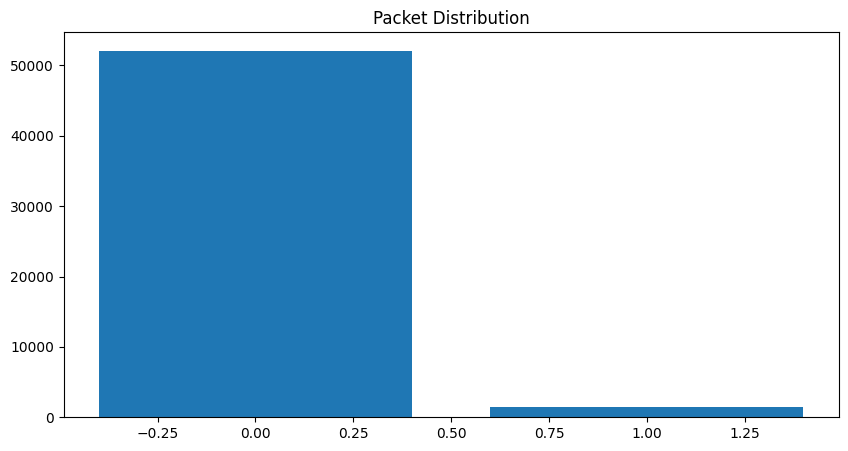

In [51]:
import matplotlib.pyplot as plt
def visualizeBar(final_data):
    # bar chart of packets label
    plt.figure(figsize=(10, 5))
    plt.title('Packet Distribution')
    # plt.bar(x=['Benign', 'FTP-BruteForce', 'SSH-Bruteforce'], height=network_data['Label'].value_counts(), color=['blue', 'magenta', 'cyan'])
    plt.bar(x=final_data['Label'].unique(), height=final_data['Label'].value_counts())
    p = plt.gcf()
#%%time
# network_data = dropInfinateNull(network_data)
visualizeBar(final_data)

In [52]:
final_data.head

<bound method NDFrame.head of               Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
Label                                                                      
0.0   386068       0.998913      0.000019      0.000016     2.908752e-07   
      514842       0.998911      0.000026      0.000016     6.475435e-06   
      547          0.998960      0.000026      0.000024     6.475435e-06   
      252084       0.998964      0.000019      0.000032     6.717831e-07   
      268879       0.998912      0.000000      0.000008     3.739823e-07   
...                     ...           ...           ...              ...   
1.0   115974       0.998912      0.000013      0.000032     2.257745e-06   
      122140       0.998912      0.000013      0.000032     2.257745e-06   
      121879       0.998912      0.000013      0.000032     2.257745e-06   
      116204       0.998912      0.000013      0.000032     2.257745e-06   
      119133       0.998912      0.000013      0.000032   

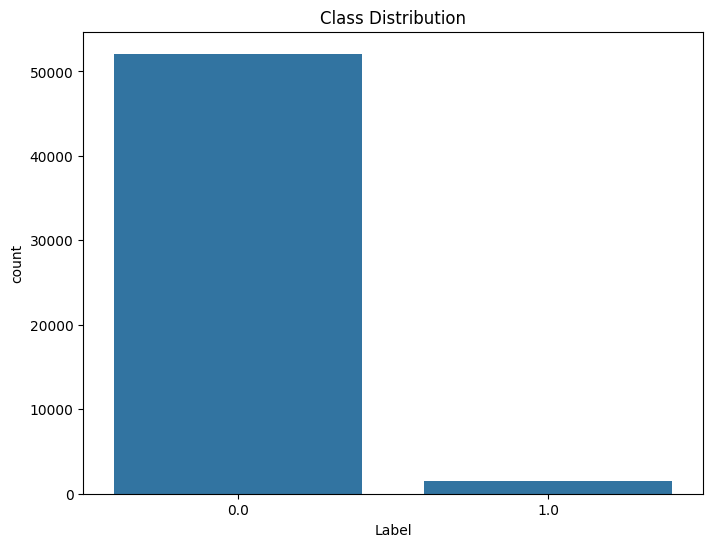

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=final_data)
plt.title('Class Distribution')
plt.show()

In [54]:
X = X_train
y = y_train

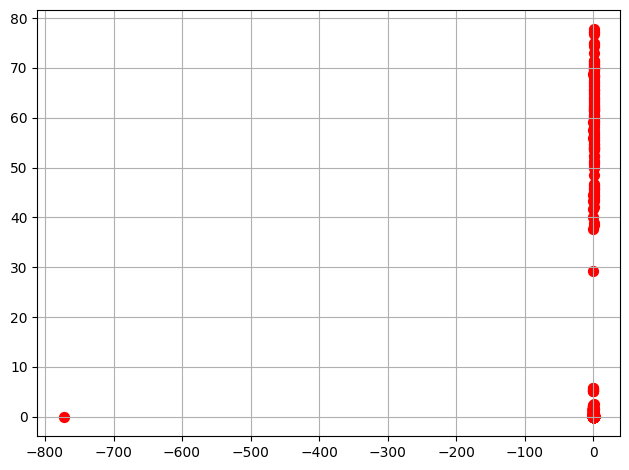

In [55]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c='red', marker='o', s=50)
plt.grid()
plt.tight_layout()
#plt.savefig('./figures/spheres.png', dpi=300)
plt.show()

In [56]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [57]:
class GANClustering:
    def __init__(self, num_clients, ratio, r, epochs_gan, k, num_rounds, h, X, Y):
        self.num_clients = num_clients
        self.ratio = ratio
        self.r = r
        self.epochs_gan = epochs_gan
        self.k = k
        self.num_rounds = num_rounds
        self.h = h
        self.X = X
        self.Y = Y[:X.shape[0]]
        self.cluster_gan = ClusterGAN(input_dim=X.shape[1], latent_dim=64, X=X, Y=Y)
        self.hyp_cluster = HypCluster(num_models=5, input_dim=X.shape[1], X=X, Y=Y)

    def cluster_division(self):
        for round in range(self.num_rounds):
            # Phase 1: Client Processing
            client_data = self.X[round]
            client_losses = self.process_clients(client_data)

            # Phase 2: Data Aggregation
            aggregated_losses = np.mean(client_losses)

            # Phase 3: Cluster Evaluation
            avg_loss = aggregated_losses
            print(f"Average loss for the cluster in round {round + 1}: {avg_loss}")

    def process_client_data(self, client_data):
        client_gan_data = []
        for i in range(self.epochs_gan):
        # Train GAN
            disc_loss, gen_loss = self.cluster_gan.train_gan(1)

        # Store generated images
            generated_images = self.cluster_gan.generator(np.random.normal(0, 1, (client_data.shape[0], self.cluster_gan.input_dim)), training=True)
            client_gan_data.append(generated_images)

        return np.array(client_gan_data)

    def process_client_data(self, client_data, epochs):
        return self.cluster_gan.process_client_data(client_data, epochs)
    
    def calculate_loss(self, gan_data):
        return np.mean([self.cluster_gan.calculate_loss(data) for data in gan_data])

In [58]:
class ClusterGAN:
    def __init__(self, input_dim, latent_dim, X, Y):
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.X = X
        self.Y = Y
        self.generator = self.build_generator()
        self.discriminator = self.build_discriminator()
        self.d_optimizer = tf.keras.optimizers.Adam(1e-4)  # Define the discriminator optimizer
        self.g_optimizer = tf.keras.optimizers.Adam(1e-4)  # Define the generator optimizer

    def build_generator(self):
        model = keras.Sequential()
        model.add(layers.Dense(256, input_shape=(self.latent_dim,)))
        model.add(layers.LeakyReLU())
        model.add(layers.Dense(self.input_dim // 2))
        model.add(layers.LeakyReLU())
        model.add(layers.Dense(self.input_dim))
        model.add(layers.Activation('tanh'))
        return model

    def build_discriminator(self):
        model = keras.Sequential()
        model.add(layers.Dense(256, input_shape=(self.input_dim,)))
        model.add(layers.LeakyReLU())
        model.add(layers.Dense(128))
        model.add(layers.LeakyReLU())
        model.add(layers.Dense(1, activation='sigmoid'))
        return model

    def train_gan(self, epochs):
        for epoch in range(epochs):
            for i in range(self.X.shape[0]):
                real_images = tf.convert_to_tensor([self.X[i]])
                with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
                # Sample noise vectors
                    z = np.random.normal(0, 1, (1, self.latent_dim))

                # Generate fake image
                    generated_image = self.generator(z, training=True)

                # Calculate discriminator loss for real images
                    disc_real_output = self.discriminator(real_images, training=True)
                    disc_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(tf.ones_like(disc_real_output), disc_real_output))

                # Calculate discriminator loss for fake images
                    disc_fake_output = self.discriminator(generated_image, training=True)
                    disc_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(tf.zeros_like(disc_fake_output), disc_fake_output))
                    disc_loss = disc_loss_real + disc_loss_fake

                # Calculate generator loss
                    gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(tf.ones_like(disc_fake_output), disc_fake_output))

            # Get gradients
                gradients_disc = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)
                gradients_gen = gen_tape.gradient(gen_loss, self.generator.trainable_variables)

                # Update discriminator weights
                self.d_optimizer.apply_gradients(zip(gradients_disc, self.discriminator.trainable_variables))
  
            # Update generator weights
                self.g_optimizer.apply_gradients(zip(gradients_gen, self.generator.trainable_variables))

        return disc_loss, gen_loss
    def process_client_data(self, client_data, epochs):
        client_gan_data = []
        for i in range(epochs):
            # Train GAN
            disc_loss, gen_loss = self.train_gan(1)

            # Store generated images
            generated_images = self.generator(np.random.normal(0, 1, (client_data.shape[0], self.latent_dim)))
            client_gan_data.append(generated_images)

        return np.array(client_gan_data)
    
    def calculate_loss(self, client_gan_data):
        return np.mean(np.linalg.norm(client_gan_data - self.X, axis=1)) 


In [59]:
num_clients = 10
ratio = 0.5
input_dim = 50
r=5
h=3
num_rounds=5
epochs_gan=10
k=5
thresold=0.8

In [61]:
class HypCluster:
    def __init__(self, num_models, input_dim, X, Y):
        self.num_models = num_models
        self.input_dim = input_dim
        self.X = X
        self.Y = Y
        self.models = [self.build_model() for _ in range(num_models)]

    def build_model(self):
        model = keras.Sequential()
        model.add(layers.Dense(256, input_shape=(self.input_dim,)))
        model.add(layers.LeakyReLU())
        model.add(layers.Dense(128))
        model.add(layers.LeakyReLU())
        model.add(layers.Dense(self.num_models))
        model.add(layers.Softmax())

        return model

    def process_client_data(self, client_data):
        client_hyp_data = []
        for model in self.models:
            print("Shapes - client_data:", client_data.shape, "self.Y:", self.Y.shape)
            model.compile(loss='mse', optimizer='adam')
            model.fit(client_data, self.Y, epochs=10)
            predictions = model.predict(client_data)
            client_hyp_data.append(predictions) 

        return np.array(client_hyp_data)
    def calculate_loss(self, client_hyp_data):
        return np.mean(np.linalg.norm(client_hyp_data - self.Y, axis=1))


In [62]:
num_clients = 10
ratio = 0.5
input_dim = 50
r=5
h=3
num_rounds=5
epochs_gan=10
k=5

In [63]:

gan = GANClustering(num_clients, ratio, r, epochs_gan, k, num_rounds, h, X, Y)
hyp_cluster = HypCluster(num_clients, input_dim, X, Y)

gan_data = [gan.process_client_data(X[i], 10) for i in range(num_clients)]

hyp_cluster_data = hyp_cluster.process_client_data(X)

gan_loss = gan.calculate_loss(gan_data)
hyp_cluster_loss = hyp_cluster.calculate_loss(hyp_cluster_data)

print("GAN Loss:", gan_loss)
print("HypCluster Loss:", hyp_cluster_loss)


Shapes - client_data: (50, 50) self.Y: (50, 10)

Epoch 1/10

2/2 [==============================] - 1s 0s/step - loss: 0.2371
Epoch 2/10
2/2 [==============================] - 0s 0s/step - loss: 0.2340
Epoch 3/10
2/2 [==============================] - 0s 8ms/step - loss: 0.2328
Epoch 4/10
2/2 [==============================] - 0s 5ms/step - loss: 0.2321
Epoch 5/10
2/2 [==============================] - 0s 0s/step - loss: 0.2313
Epoch 6/10
2/2 [==============================] - 0s 3ms/step - loss: 0.2301
Epoch 7/10
2/2 [==============================] - 0s 13ms/step - loss: 0.2292
Epoch 8/10
2/2 [==============================] - 0s 2ms/step - loss: 0.2282
Epoch 9/10
2/2 [==============================] - 0s 3ms/step - loss: 0.2272
Epoch 10/10
2/2 [==============================] - 0s 0s/step
Shapes - client_data: (50, 50) self.Y: (50, 10)
Epoch 1/10
2/2 [==============================] - 1s 0s/step - loss: 0.2367
Epoch 2/10
2/2 [==============================] - 0s 15ms/step - loss: 0

In [68]:
import numpy as np

class NoClustering:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def calculate_loss(self):
        return np.mean(np.linalg.norm(self.X - self.Y, axis=1))

Y_high_deviation = X + np.random.normal(0, 1, size=X.shape)
no_cluster_high_deviation = NoClustering(X, Y_high_deviation)
no_cluster_high_deviation_loss = no_cluster_high_deviation.calculate_loss()
print("Loss without clustering:", no_cluster_high_deviation_loss)


Loss without clustering: 6.913900534787478


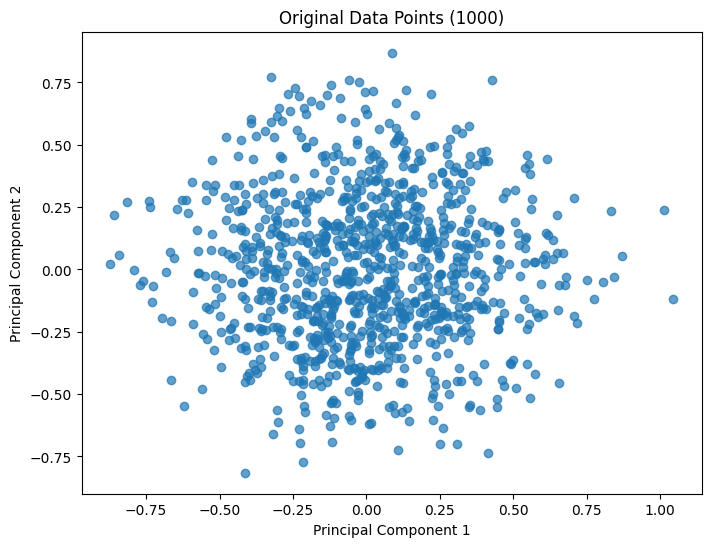

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

num_points = 1000
input_dim = 10
X_large = np.random.rand(num_points, input_dim)

def visualize_original_data(X, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()


visualize_original_data(X_large, title='Original Data Points')



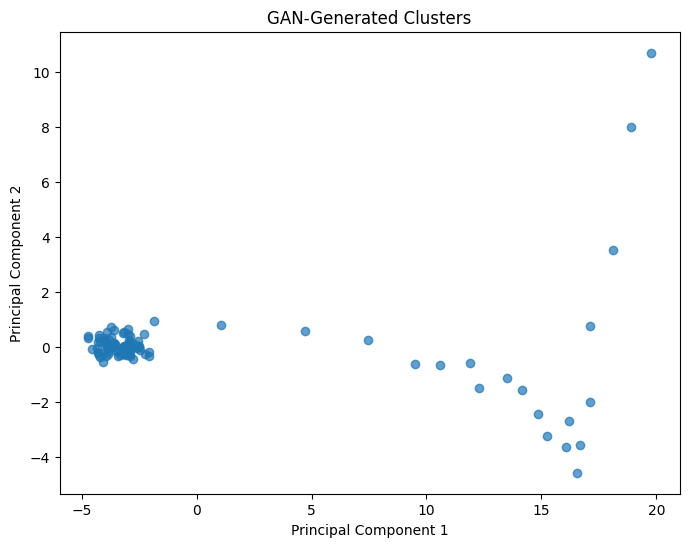

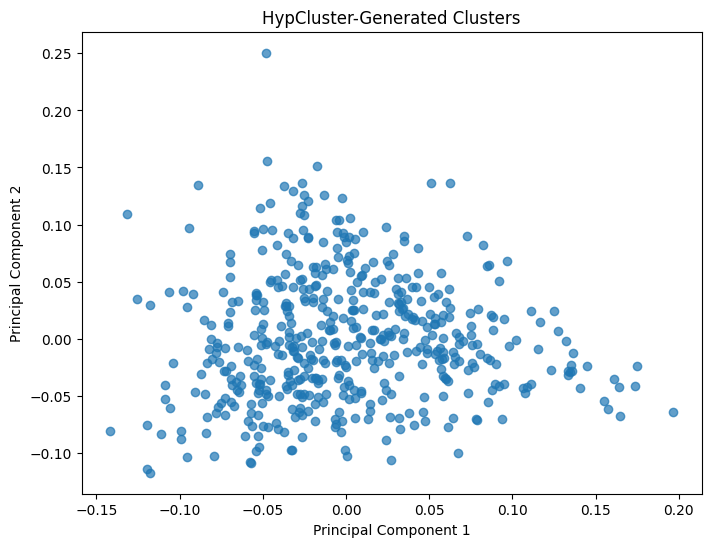

In [70]:
import numpy as np
from sklearn.decomposition import PCA


def visualize_clusters(X, title):
    
    X_concatenated = np.concatenate(X, axis=0)
    if X_concatenated.ndim > 2:
        X_concatenated = X_concatenated.reshape(X_concatenated.shape[0], -1)

    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_concatenated)

    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()


visualize_clusters(gan_data, title='GAN-Generated Clusters')

visualize_clusters(hyp_cluster_data, title='HypCluster-Generated Clusters')


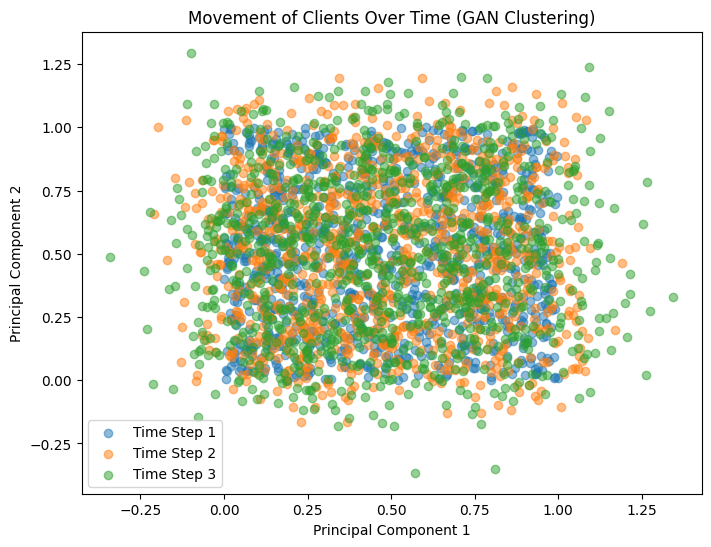

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def generate_gan_data(num_points, input_dim):

    gan_data = np.random.rand(num_points, input_dim)
    return gan_data

num_points = 1000
input_dim = 10
gan_data_initial = generate_gan_data(num_points, input_dim)

num_time_steps = 3
movement_scale = 0.1 

def simulate_movement(X_initial, num_time_steps, movement_scale):
    X_movement = [X_initial.copy()]
    for t in range(1, num_time_steps):
        movement = np.random.normal(0, movement_scale, size=X_initial.shape)
    
        X_new = X_movement[-1] + movement
        X_movement.append(X_new)
    return X_movement

gan_data_movement = simulate_movement(gan_data_initial, num_time_steps, movement_scale)

# Visualize the movement of clients over time in the context of GAN clustering
def visualize_movement(X_movement, title):
    # Perform PCA for dimensionality reduction
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_movement[-1])

    plt.figure(figsize=(8, 6))
    for t in range(len(X_movement)):
        plt.scatter(X_movement[t][:, 0], X_movement[t][:, 1], label=f'Time Step {t+1}', alpha=0.5)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()


visualize_movement(gan_data_movement, title='Movement of Clients Over Time (GAN Clustering)')
